다중 선형회귀 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 선형회귀 관련 라이브러리 가져오기
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

In [2]:
# 간단한 예제

print(np.array([[0,1],[1,2],[2,2.5]]))
print()
print(np.array([0,1.2,1.6]))

[[0.  1. ]
 [1.  2. ]
 [2.  2.5]]

[0.  1.2 1.6]


In [3]:
# 데이터

x = np.array([[0,1],[1,2],[2,2.5]])
y = np.array( [0,1.2,1.6])

# 선형회귀 object 생성
reg = linear_model.LinearRegression()

# 훈련
reg.fit(x,y)

# training data 예측
pred_train = reg.predict(x)

# test
pred_test = reg.predict([[1.5, 2]])

In [6]:
# 기울기 (계수)
print(reg.coef_)

# 절편
print(reg.intercept_)

[-0.4  1.6]
-1.5999999999999988


In [ ]:
# y = -1.59999... + (-0.4)x1 + 1.6x2

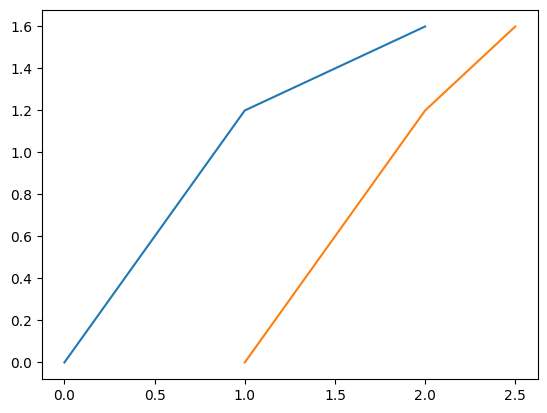

In [4]:
plt.plot(x,y)

In [7]:
# test data 예측값
pred_test

array([1.])

In [8]:
# coefficient(기울기, beta1, beta2)
reg.coef_

array([-0.4,  1.6])

In [9]:
# 데이터 분석

path = './data/Advertising.csv'
pd.read_csv(path, index_col=0)
ad = pd.read_csv(path, index_col=0)
ad

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [10]:
# 선형회귀 모델 적용

ad.shape

(200, 4)

In [11]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [12]:
# training / test data 분리
train = ad[:-20] # 180
test = ad[-20:]  # 20

# training data 의 feature / response 분리
train_x = train[['TV', 'Radio', 'Newspaper']]
train_y = train[['Sales']]

# test data 의 feature / response 분리
test_x = test[['TV', 'Radio', 'Newspaper']]
test_y = test[['Sales']]

In [13]:
# 선형회귀 객체 만들기
lr = linear_model.LinearRegression()

# training data >> 모델 적합
lr.fit(train_x, train_y)

# training data 이용, 예측 (실무 : 모델 적합도, 과적합 여부 판단)
train_y_pred = lr.predict(train_x)

# test data 이용, 예측 (**)
test_y_pred = lr.predict(test_x)


In [14]:
# coefficients
lr.coef_

array([[ 0.04638909,  0.18867512, -0.0024597 ]])

In [15]:
# training MSE
mean_squared_error(train_y, train_y_pred)

2.827418881491677

In [16]:
# test MSE
mean_squared_error(test_y, test_y_pred)

2.452817930717681

In [17]:
# r2_score
r2_score(train_y, train_y_pred)

0.8923555807586847

In [18]:
r2_score(test_y, test_y_pred)
# 과소적합 의심 >> n을 늘려야 함

0.9288231093749744

In [21]:
# statsmodel (sm) 이용
# 반드시 x0 feature 추가해야만 함
# 일반적으로 intercept가 추가되어야 함
train_x

sm_train_x = train_x
sm_train_x['x0'] = 1

sm_test_x = test_x
sm_test_x['x0'] = 1

In [22]:
sm_train_x

,TV,Radio,Newspaper,x0
1,230.1,37.8,69.2,1
2,44.5,39.3,45.1,1
3,17.2,45.9,69.3,1
4,151.5,41.3,58.5,1
5,180.8,10.8,58.4,1
...,...,...,...,...
176,276.9,48.9,41.8,1
177,248.4,30.2,20.3,1
178,170.2,7.8,35.2,1
179,276.7,2.3,23.7,1


In [23]:
sm_test_x

,TV,Radio,Newspaper,x0
181,156.6,2.6,8.3,1
182,218.5,5.4,27.4,1
183,56.2,5.7,29.7,1
184,287.6,43.0,71.8,1
185,253.8,21.3,30.0,1
186,205.0,45.1,19.6,1
187,139.5,2.1,26.6,1
188,191.1,28.7,18.2,1
189,286.0,13.9,3.7,1
190,18.7,12.1,23.4,1


In [24]:
# training
results = sm.OLS(train_y, sm_train_x).fit()
# training 결과 확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     486.3
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           6.57e-85
Time:                        10:19:27   Log-Likelihood:                -348.95
No. Observations:                 180   AIC:                             705.9
Df Residuals:                     176   BIC:                             718.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0464      0.001     31.154      0.000       0.043       0.049
Radio          0.1887      0.009     20.347      0.000       0.170       0.207
Newspaper     -0.0025      0.006     -0.395      0.693      -0.015       0.010
x0             2.8399      0.342      8.293      0.000       2.164       3.516
==============================================================================
Omnibus:                       56.196   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.467
Skew:                          -1.343   Prob(JB):                     3.15e-31
Kurtosis:                       6.394   Cond. No.                         467.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

다항 회귀분석

In [25]:
from sklearn.preprocessing import PolynomialFeatures

np.arange(6).reshape(3,2)

x = np.arange(6).reshape(3,2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [26]:
# [1,a,b,a^2, ab, b^2] feature 생성
poly = PolynomialFeatures(degree=2)

poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [27]:
# interaction feature 만 생성하고 싶을 때
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

auto 데이터 활용, 회귀분석 실습

In [28]:
path = './data/Auto.csv'

pd.read_csv(path)

auto = pd.read_csv(path)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [29]:
auto.shape

(397, 9)

In [30]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [31]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [32]:
auto['horsepower'][32]

'?'

In [33]:
# horsepower '?' 값을 '0'으로 대체
auto['horsepower'] = auto['horsepower'].replace('?', '0')

In [34]:
auto['horsepower'][32]

'0'

In [35]:
auto['horsepower'][:10]

0    130
1    165
2    150
3    150
4    140
5    198
6    220
7    215
8    225
9    190
Name: horsepower, dtype: object

In [36]:
# auto['horsepower'] >> 숫자로 변경

auto['horsepower'] = pd.to_numeric(auto['horsepower'])

In [37]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    int64  
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.0+ KB


auto 다중선형회귀 (sklearn)

In [38]:
auto[:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [39]:
auto = auto.drop(['name'], axis=1)

In [40]:
auto[:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


In [41]:
# training / test 데이터 분리

train = auto[:-40]
test = auto[-40:]

# training data 의 feature와 response 분리
train_x = train.iloc[:, 1:]
train_y = train[['mpg']]
print(train_x)

print()
# test data 의 feature와 response 분리
test_x = test.iloc[:, 1:]
test_y = test[['mpg']]
print(test_x)

     cylinders  displacement  horsepower  weight  acceleration  year  origin
0            8         307.0         130    3504          12.0    70       1
1            8         350.0         165    3693          11.5    70       1
2            8         318.0         150    3436          11.0    70       1
3            8         304.0         150    3433          12.0    70       1
4            8         302.0         140    3449          10.5    70       1
..         ...           ...         ...     ...           ...   ...     ...
352          4          98.0          65    2380          20.7    81       1
353          4         105.0          74    2190          14.2    81       2
354          4         100.0           0    2320          15.8    81       2
355          4         107.0          75    2210          14.4    81       3
356          4         108.0          75    2350          16.8    81       3

[357 rows x 7 columns]

     cylinders  displacement  horsepower  weight  a

In [42]:
# 선형회귀 객체 생성
lr = linear_model.LinearRegression()

# training data 를 이용 >> 적합
lr.fit(train_x, train_y)

# training data 예측
train_y_pred = lr.predict(train_x)

# test data 예측
test_y_pred = lr.predict(test_x)

In [43]:
lr.coef_

array([[-0.3736576 ,  0.01504545, -0.01430246, -0.00625177,  0.03568412,
         0.74444736,  1.44269524]])

In [44]:
mean_squared_error(train_y, train_y_pred)

10.483252900091147

In [45]:
mean_squared_error(test_y, test_y_pred)

14.531581917722571

In [46]:
r2_score(train_y, train_y_pred)

0.8200186818482571

In [47]:
r2_score(test_y, test_y_pred)

0.5505537907484991

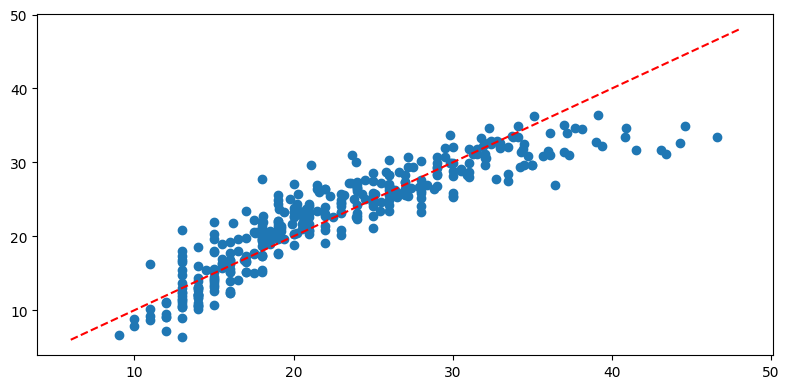

In [51]:
# 시각화

plt.figure(figsize=(8,4))
plt.scatter(train_y, train_y_pred)
plt.plot([6,48], [6,48], '--r')
plt.tight_layout()

plt.show()